
# Challenge 1


In [0]:
# File location and type
file_location = "/FileStore/tables/global_terrorism.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

eventid iyear imonth iday approxdate extended resolution country country_txt region region_txt provstate city latitude longitude specificity vicinity location summary crit1 crit2 crit3 doubtterr alternative alternative_txt multiple success suicide attacktype1 attacktype1_txt attacktype2 attacktype2_txt attacktype3 attacktype3_txt targtype1 targtype1_txt targsubtype1 targsubtype1_txt corp1 target1 natlty1 natlty1_txt targtype2 targtype2_txt targsubtype2 targsubtype2_txt corp2 target2 natlty2 natlty2_txt targtype3 targtype3_txt targsubtype3 targsubtype3_txt corp3 target3 natlty3 natlty3_txt gname gsubname gname2 gsubname2 gname3 gsubname3 motive guncertain1 guncertain2 guncertain3 individual nperps nperpcap claimed claimmode claimmode_txt claim2 claimmode2 claimmode2_txt claim3 claimmode3 claimmode3_txt compclaim weaptype1 weaptype1_txt weapsubtype1 weapsubtype1_txt weaptype2 weaptype2_txt weapsubtype2 weapsubtype2_txt weaptype3 weaptype3_txt weapsubtype3 weapsubtype3_txt weaptype4 weaptype4_txt weapsubtype4 weapsubtype4_txt weapdetail nkill nkillus nkillter nwound nwoundus nwoundte property propextent propextent_txt propvalue propcomment ishostkid nhostkid nhostkidus nhours ndays divert kidhijcountry ransom ransomamt ransomamtus ransompaid ransompaidus ransomnote hostkidoutcome hostkidoutcome_txt nreleased addnotes scite1 scite2 scite3 dbsource INT_LOG INT_IDEO INT_MISC INT_ANY related 1.97E11 1970 7 2 null 0 null 58 Dominican Republic 2 Central America & Caribbean null Santo Domingo 18.456792 -69.951164 1 0 null null 1 1 1 0 null null 0 1 0 1 Assassination null null null null 14 Private Citizens & Property 68 Named Civilian null Julio Guzman 58 Dominican Republic null null null null null null null null null null null null null null null null MANO-D null null null null null null 0 null null 0 null null null null null null null null null null null null 13 Unknown null null null null null null null null null null null null null null null 1 null null 0 null null 0 null null null null 0 null null null null null null 0 null null null null null null null null null null null null PGIS 0 0 0 0 null 1.97E11 1970 0 0 null 0 null 130 Mexico 1 North America Federal Mexico city 19.371887 -99.086624 1 0 null null 1 1 1 0 null null 0 1 0 6 Hostage Taking (Kidnapping) null null null null 7 Government (Diplomatic) 45 Diplomatic Personnel (outside of embassy, consulate) Belgian Ambassador Daughter Nadine Chaval, daughter 21 Belgium null null null null null null null null null null null null null null null null 23rd of September Communist League null null null null null null 0 null null 0 7 null null null null null null null null null null null 13 Unknown null null null null null null null null null null null null null null null 0 null null 0 null null 0 null null null null 1 1 0 null null null Mexico 1 800000 null null null null null null null null null null null PGIS 0 1 1 1 null 1.97001E11 1970 1 0 null 0 null 160 Philippines 5 Southeast Asia Tarlac Unknown 15.478598 120.599741 4 0 null null 1 1 1 0 null null 0 1 0 1 Assassination null null null null 10 Journalists & Media 54 Radio Journalist/Staff/Facility Voice of America Employee 217 United States null null null null null null null null null null null null null null null null Unknown null null null null null null 0 null null 0 null null null null null null null null null null null null 13 Unknown null null null null null null null null null null null null null null null 1 null null 0 null null 0 null null null null 0 null null null null null null 0 null null null null null null null null null null null null PGIS -9 -9 1 1 null 1.97001E11 1970 1 0 null 0 null 78 Greece 8 Western Europe Attica Athens 37.99749 23.762728 1 0 null null 1 1 1 0 null null 0 1 0 3 Bombing/Explosion null null null null 7 Government (Diplomatic) 46 Embassy/Consulate null U.S. Embassy 217 United States null null null null null null null null null null null null null null null null Unknown null null null null null null

In [0]:
# Create a view or table

temp_table_name = "global_terrorism_csv"

df.createOrReplaceTempView(temp_table_name)

In [0]:
# With this registered as a temp view, it will only be available to this particular notebook. If you'd like other users to be able to query this table, you can also create a table from the DataFrame.
# Once saved, this table will persist across cluster restarts as well as allow various users across different notebooks to query this data.
# To do so, choose your table name and uncomment the bottom line.

permanent_table_name = "global_terrorism_csv"

# df.write.format("parquet").saveAsTable(permanent_table_name)

In [0]:
# Instalo Koalas
%pip install koalas

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
# Importo la librería
import databricks.koalas as ks
import pyspark.pandas as ps
import matplotlib.pyplot as plt 
import 

In [0]:
# Creo un nuevo dataframe de koalas

terror = df.to_koalas()

### Análisis de los datos

In [0]:
# Empiezo por una descripción general para conocer por encima los datos con los que estoy tratando

terror.describe()
print(terror.dtypes)

eventid       float64
iyear           int32
imonth          int32
iday            int32
approxdate     object
               ...   
INT_LOG        object
INT_IDEO       object
INT_MISC       object
INT_ANY        object
related        object
Length: 135, dtype: object


In [0]:
# Antes verfico si tengo datos nulos que me puedan causar problemas en futuros análisis. De ser así, tendría que hacer otro tratamiento para eliminarlos o reemplazarlos

print(terror.isnull().sum())

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152241
alternative_txt       152414
multiple                 297
success                  178
suicide                   85
attacktype1               54
attacktype1_txt           35
attacktype2           174947
attacktype2_txt       175111
attacktype3           181084
attacktype3_txt       181154
targtype1     

In [0]:
print(type(conteo))

<class 'databricks.koalas.series.Series'>


In [0]:
# Quiero saber en qué año se han dado más ataques terroristas, para eso hago un gráfico de barras porque mis datos son continuos

# Empiezo por contra la frecuencia de cada año
conteo = terror['iyear'].value_counts()

# Tuve problemas para hacer el gráfico, así que lo convertí a una serie de Pandas. Así ya no tuve problemas
conteo_pd = conteo.to_pandas()

print(conteo_pd)

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64


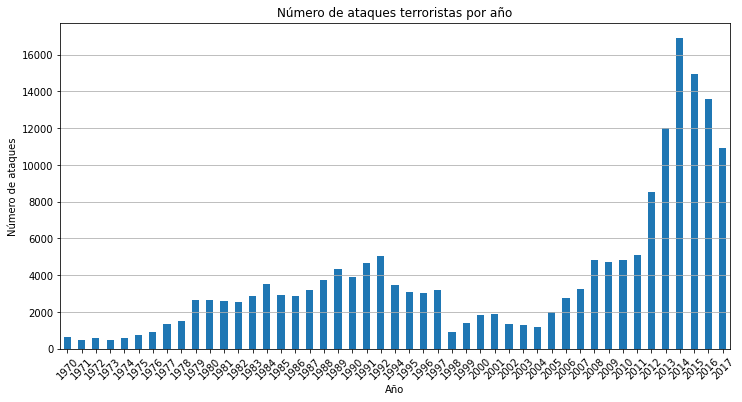

In [0]:
# Acá hago el gráfico

plt.figure(figsize=(12, 6))
conteo_pd.sort_index().plot(kind='bar')
plt.title('Número de ataques terroristas por año')
plt.xlabel('Año')
plt.ylabel('Número de ataques')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

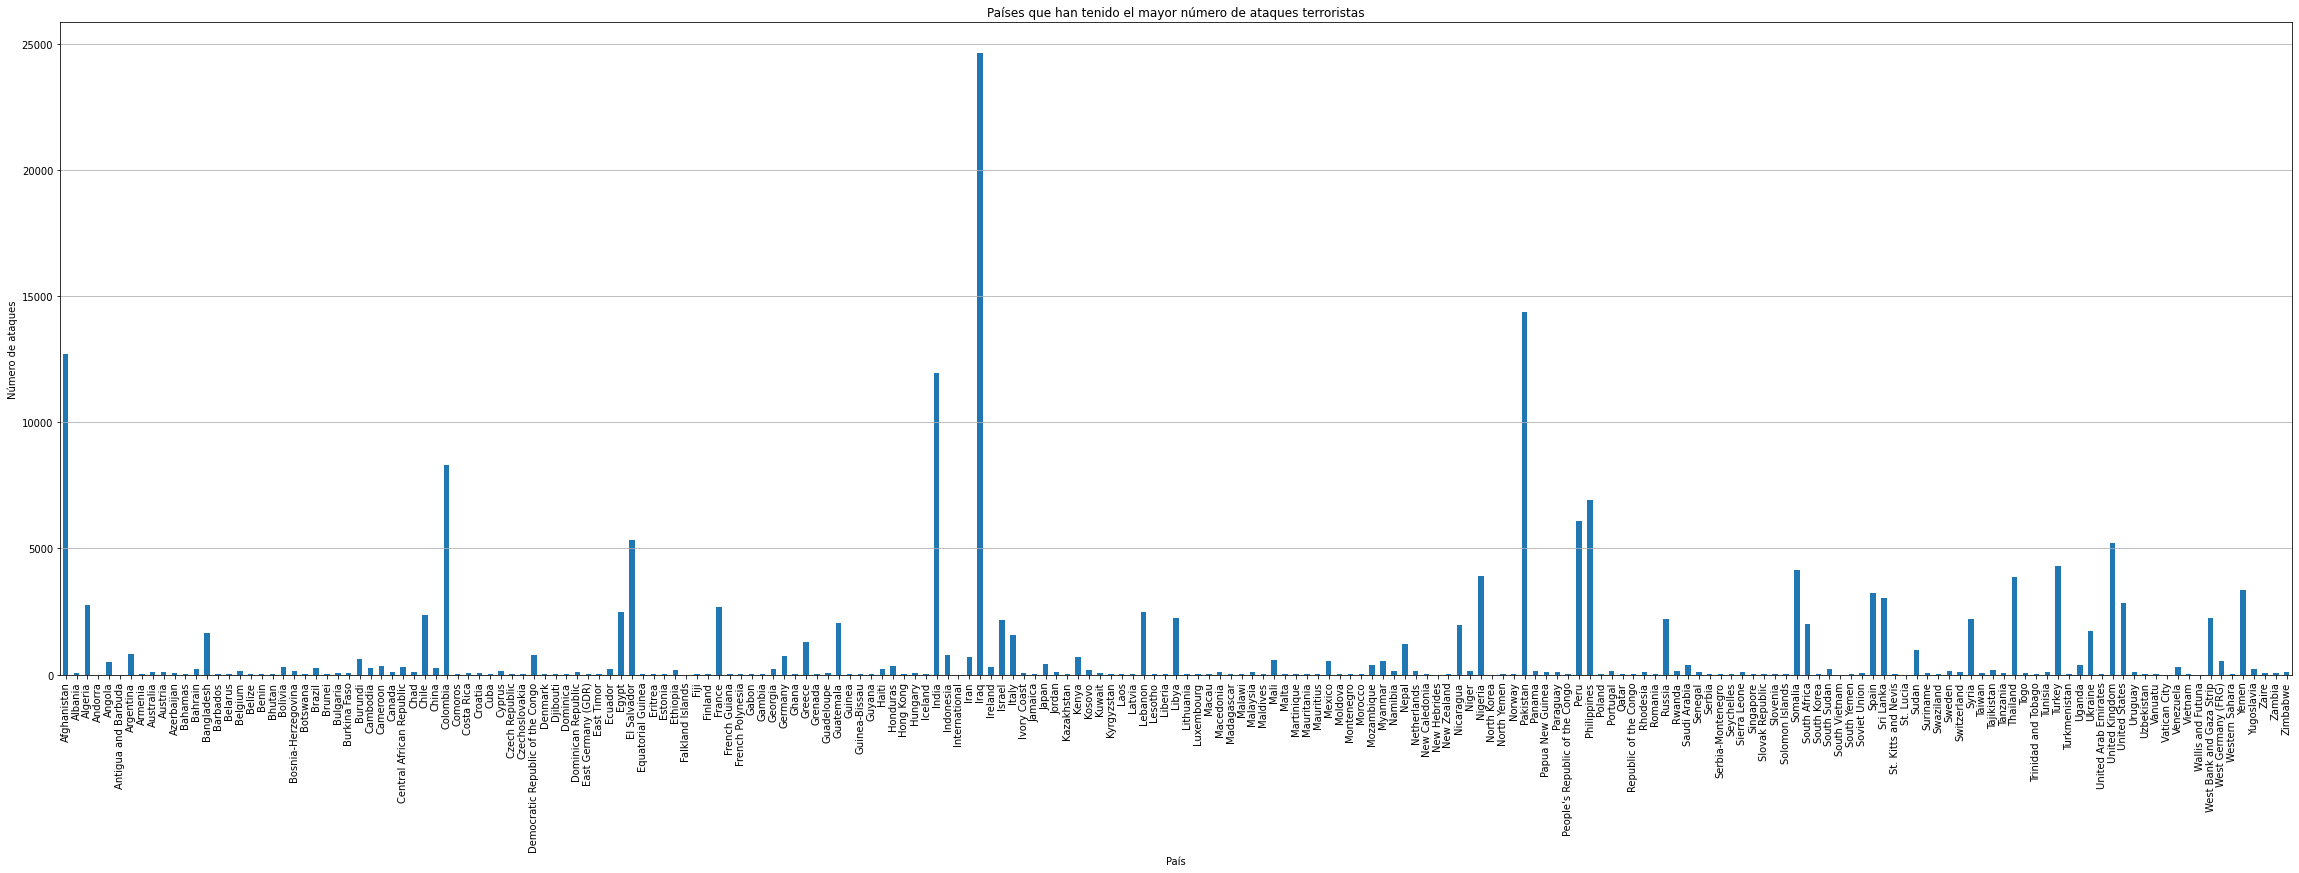

In [0]:
# La gráfica anterior es valiosa para ver el incremento que han tenido los ataques durante el tiempo. Pero también me interesa saber en qué países se han dado la mayoría de estos ataques.

# Empiezo por contar la frecuencia
c_paises = terror['country_txt'].value_counts()
c_paises_pd = c_paises.to_pandas()

# Luego hago mi gráfico de barras
plt.figure(figsize=(40, 12))
c_paises_pd.sort_index().plot(kind='bar')
plt.title('Países que han tenido el mayor número de ataques terroristas')
plt.xlabel('País')
plt.ylabel('Número de ataques')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.show()


In [0]:
# La gráfica muestra los datos, pero son tantos que no se alcanzan a apreciar de la mejor manera. Para eso, los agruparé por continente. Así puedo tener una visión general

# Primero empiezo por contar cuántos países hay en el dataset

num_paises = df.select("country_txt").distinct().count()
print(f"El número de países únicos es de {num_paises}")

El número de países únicos es de 205


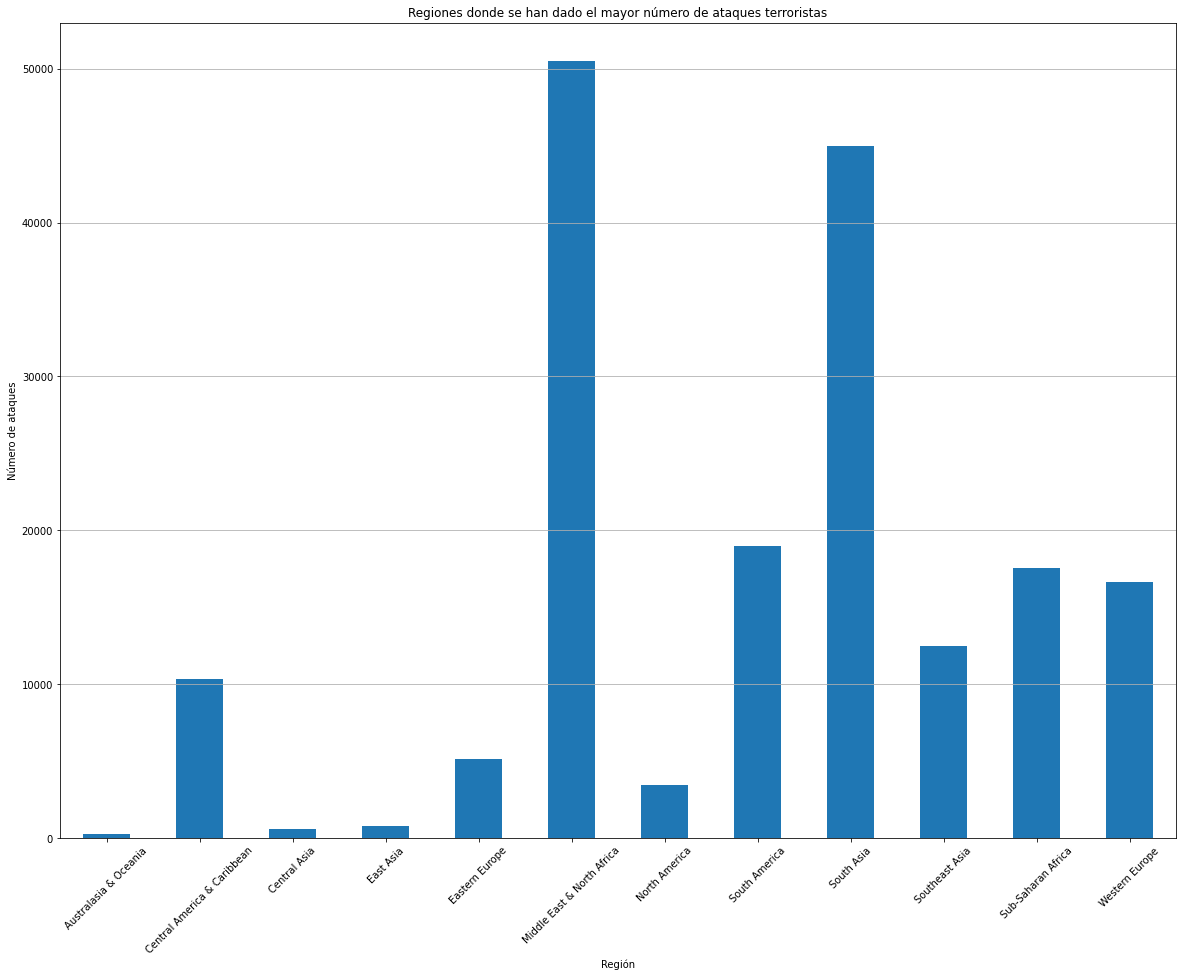

In [0]:
# Mi número de países es muy alto, pero el mismo csv tiene una columna de la región en la que se dieron los ataques. Puedo usar esta para tener una gráfica más general


# Empiezo por contar la frecuencia
c_region = terror['region_txt'].value_counts()
c_region_pd = c_region.to_pandas()

# Luego hago mi gráfico de barras
plt.figure(figsize=(20, 15))
c_region_pd.sort_index().plot(kind='bar')
plt.title('Regiones donde se han dado el mayor número de ataques terroristas')
plt.xlabel('Región')
plt.ylabel('Número de ataques')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

In [0]:
# Esta gráfica es muchísimo más entendible que la anterior. Así es fácil darse cuenta que en África del Norte y Oriente Medio se han dado la mayoría de ataques, seguido del sur de Asia.

In [0]:
# Ahora quiero saber qué tipos de ataques son los más comunes. Usaré la columna targtype1_txt, pero tiene unos valores nulos (lo sé porque anteriormente conté cuántos valores nulos tengo en todo el csv) que tengo que reemplazar. Les daré el valor "desconocido"

# Empiezo por sustituir los valores nulos
t_ataque = df.fillna({"targtype1_txt": "Desconocido"})

# Para ver que lo anterior haya funcionado, cuento cuántos valores nulos me quedan. Si me da cero, el método funcionó.
nulos_restantes = t_ataque.filter(t_ataque["targtype1_txt"].isNull()).count()
print(f"Número de valores nulos restantes: {nulos_restantes}")

Número de valores nulos restantes: 0


In [0]:
# Ahora hago un conteo para saber cuáles son los más comunes

# Obtener los 5 valores más repetidos
top_5_datos = t_ataque.groupBy("targtype1_txt").count() \
    .orderBy("count", ascending=False) \
    .limit(5)

# Mostrar los resultados
print("Los 5 tipos de ataque más comunes son:")
top_5_datos.show()

Los 5 tipos de ataque más comunes son:
+--------------------+-----+
|       targtype1_txt|count|
+--------------------+-----+
|Private Citizens ...|43366|
|            Military|27954|
|              Police|24470|
|Government (General)|21224|
|            Business|20573|
+--------------------+-----+



In [0]:
# Sabiendo qué tipos de ataque son los más comunes, me interesa saber quiénes los hicieron. Para eso tengo que reemplazar los datos nulos de la columna "gname".

grupos = df.fillna({"gname": "Desconocido"})

# Para ver que lo anterior haya funcionado, cuento cuántos valores nulos me quedan. Si me da cero, el método funcionó.
nulos_gname = grupos.filter(grupos["gname"].isNull()).count()
print(f"Número de valores nulos restantes: {nulos_gname}")
print(type(nulos_gname))

Número de valores nulos restantes: 0
<class 'int'>


In [0]:
# Ahora hago un conteo para saber cuáles son los más comunes

# Para obtener los 5 valores más repetidos
top_5_grupos = grupos.groupBy("gname").count() \
    .orderBy("count", ascending=False) \
    .limit(5)

# Para mostrar los resultados
print("Los 5 grupos terroristas que más ataques hacen son:")
top_5_grupos.show()

Los 5 grupos terroristas que más ataques hacen son:
+--------------------+-----+
|               gname|count|
+--------------------+-----+
|             Unknown|82670|
|             Taliban| 7469|
|Islamic State of ...| 5610|
|   Shining Path (SL)| 4555|
|Farabundo Marti N...| 3351|
+--------------------+-----+

